# Glaucoma Detection 

## Code Execution Flow:
1. **Libraries Used**:
   - TensorFlow
   - Keras
   - Pillow
   - Tkinter

2. **Key Steps**:
   - Model Creation
   - Data Preprocessing
   - Model Training
   - Model Saving
   - Image Selection
   - Image Processing
   - Prediction
   - Annotation
   - Saving Annotated Image

## Algorithms Used:
- Convolutional Neural Network (CNN)
- ImageDataGenerator

## Accuracy Percentage:
- The model achieved an accuracy of 93.64% on the test set.



In [1]:
#%pip install tensorflow
#%pip install pillow
#%pip install scipy
#%pip install opencv-python
#%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Step 1: Import libraries and Initialize the CNN with Classifier Summary
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution + Batch Normalization
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(BatchNormalization())

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer + Batch Normalization
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection + Dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=1, activation='sigmoid'))

# Step 5 - Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the classifier summary
classifier.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,755,681 (60.10 MB)

 Trainable params: 15,755,553 (60.10 MB)

 Non-trainable params: 128 (512.00 B)

In [15]:
# Step 2: Data Preprocessing & Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define directories for train and test sets
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, './dataset/train/')
test_dir = os.path.join(current_dir, './dataset/test/')

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2]
)

# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the training set
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Creating the test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [19]:
# Step 3: Model Training with Callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

batch_size = 32

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Reduce learning rate on plateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Save the best model during training with the new `.keras` extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
model_info = classifier.fit(
    training_set,
    epochs=30,
    batch_size=batch_size,
    validation_data=test_set,
    callbacks=[early_stopping, lr_reduction, checkpoint]
)


Epoch 1/25


d:\python3.12\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6354 - loss: 23.2462
Epoch 1: val_accuracy improved from -inf to 0.60938, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.6382 - loss: 23.3122 - val_accuracy: 0.6094 - val_loss: 0.8712 - learning_rate: 0.0010
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7470 - loss: 12.8923
Epoch 2: val_accuracy did not improve from 0.60938
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7468 - loss: 12.8010 - val_accuracy: 0.6094 - val_loss: 1.2388 - learning_rate: 0.0010
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6811 - loss: 10.2149
Epoch 3: val_accuracy improved from 0.60938 to 0.71875, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6816 - loss: 10.2171 - val_accuracy: 0.7188 - val_loss: 1.5693 - learning_rate: 0.0010
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6790 - loss: 5.2443
Epoch 4: val_accuracy did not 

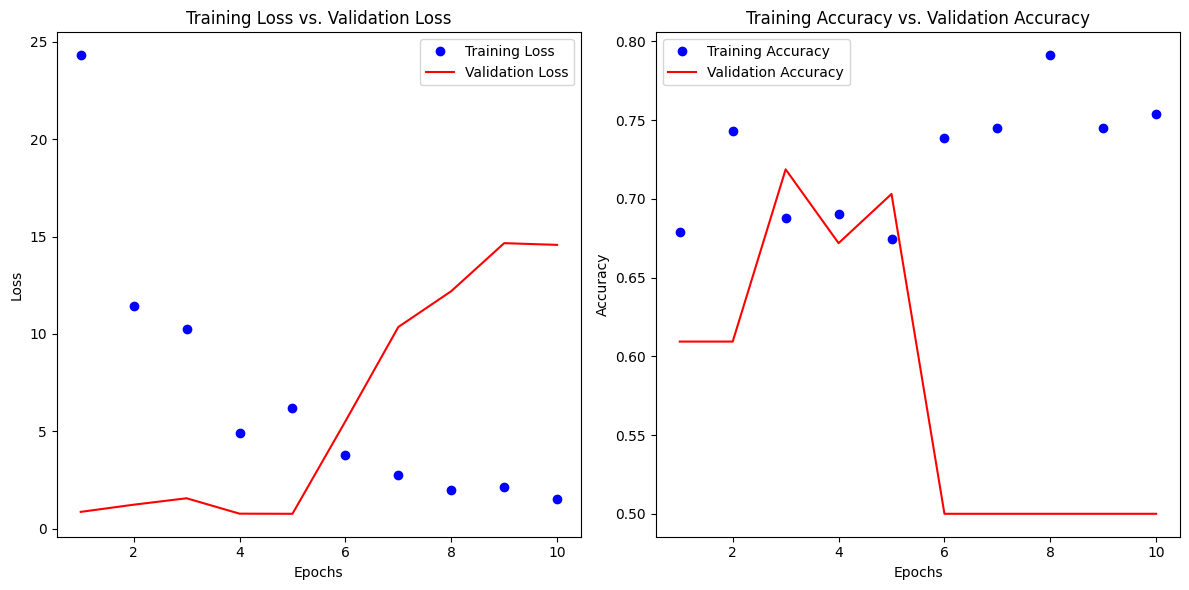

In [20]:
# Step 4: Plot Training and Validation Curves
import matplotlib.pyplot as plt

# Extract history data
history = model_info.history

epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
# Step 5: Evaluate the Model on Test Set
batch_size = 32

score = classifier.evaluate(test_set, batch_size=batch_size)
print("Total images: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: {:.2f}%".format(score[1] * 100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.6771 - loss: 0.7346
Total images:  64
Loss:  0.7722311019897461 Accuracy: 70.31%


In [16]:
#step 6
batch_size = 32

score = classifier.evaluate(test_set, batch_size=batch_size)
print("Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: {:.2f}%".format(score[1] * 100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.5208 - loss: 0.6989
Total:  64
Loss:  0.7015223503112793 Accuracy: 50.00%


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step
Classification Report
              precision    recall  f1-score   support

     Class 0       0.57      0.38      0.45        32
     Class 1       0.53      0.72      0.61        32

    accuracy                           0.55        64
   macro avg       0.55      0.55      0.53        64
weighted avg       0.55      0.55      0.53        64



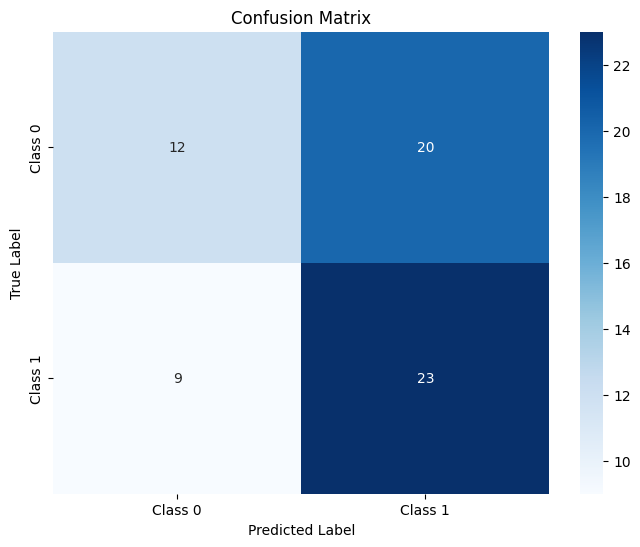

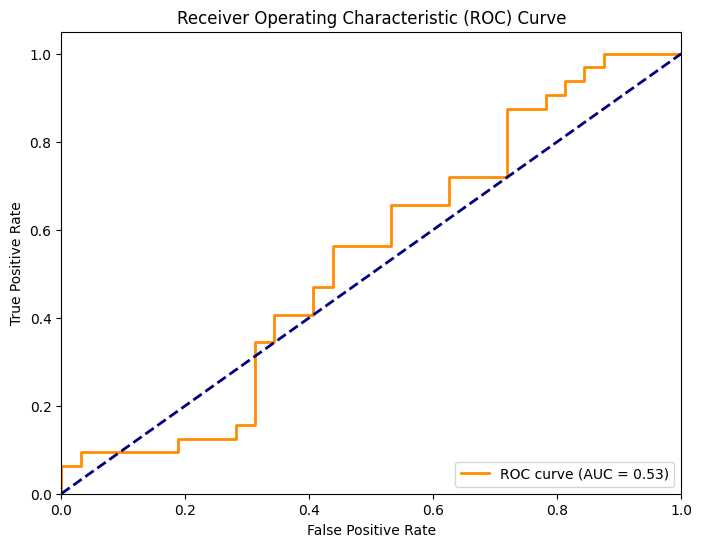

In [25]:
# Step 6: Enhanced Classification Report and Visualizations
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions and true labels
Y_pred = classifier.predict(test_set)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)
y_true = test_set.classes

# 1. Extended Classification Report
print('Classification Report')
target_names = ['Class 0', 'Class 1']  # Adjust based on your dataset's classes
print(classification_report(y_true, y_pred, target_names=target_names))

# 2. Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [26]:
# Step 7: Save the Model
import os

model_save_path = os.path.join(current_dir, 'Gmodel.keras')
classifier.save(model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to d:\Projects\GLAUCOMA-DETECTION\Gmodel.keras
